In [2]:
# !pip install torch
import torch
print(torch.__version__)

print(torch.version.cuda)
print(torch.backends.cudnn.version())

OSError: [WinError 182] 作業系統無法執行 %1。 Error loading "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [ ]:
# !pip install tqdm
# !pip install scikit-image
import tensorflow as tf
import os
import random
import numpy as np
import cv2
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from PIL import Image



In [ ]:
image = cv2.imread('D:/TOPIC/eight_seg/img/img10_20.png')
image= cv2.resize(image, (256, 256))
cv2.startWindowThread()
cv2.namedWindow("preview1")
cv2.imshow("preview1", image)
cv2.waitKey(0)

## mask轉成灰階

In [ ]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

IMG_PATH = 'D:/TOPIC/eight_seg/img/'
MASK_PATH = 'D:/TOPIC/eight_seg/mask/'

train_ids = next(os.walk(IMG_PATH))[2]
train_ids_mask = next(os.walk(MASK_PATH))[2]


X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
Y_train = np.zeros((len(train_ids_mask), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
for mask_file in next(os.walk(MASK_PATH))[2]:
        print(mask_file)
        file = MASK_PATH + mask_file
        print(file)
        mask = imread(MASK_PATH + mask_file)
        print(mask.shape)
        test = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        print(test.shape)
        ret, output1 = cv2.threshold(test, 10, 255, cv2.THRESH_BINARY)
        print(output1.shape)

        output1 = rgb2gray(output1)
        print(output1.shape)

        output1 *= 255
        im = Image.fromarray(output1)
        im = im.convert('L')
        im.save(f"D:/TOPIC/eight_seg/mask_gray/{mask_file}")

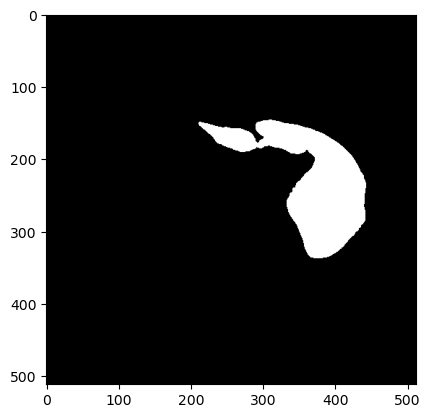

In [77]:
path = 'D:/TOPIC/eight_seg/mask_gray/mask10_14.png'
a = cv2.imread(path)
plt.imshow(a)
plt.show()

## classify image and mask

In [13]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

IMG_PATH = 'D:/TOPIC/eight_seg/img/'
MASK_PATH = 'D:/TOPIC/eight_seg/mask_gray/'

train_ids = next(os.walk(IMG_PATH))[2]
train_ids_mask = next(os.walk(MASK_PATH))[2]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids_mask), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)   #np.bool
Z_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    id_img = id_
    id_mask = id_.replace('img','mask')
    path_img = IMG_PATH + id_img
    path_mask = MASK_PATH + id_mask
    one = cv2.imread(path_img)
    # print("image")
    # print(one)
    two = cv2.imread(path_mask)
    # print("mask")
    # print(two)
    ret, two = cv2.threshold(two, 10, 255, cv2.THRESH_BINARY)
    # print(two.shape)
    three = cv2.bitwise_and(one, two)
    # print("output")
    # print(three.shape)
    # plt.imshow(three)
    # plt.show()
    one = np.resize(one, (128, 128, 3))
    two = np.resize(two, (128, 128, 3))
    three = np.resize(two, (128, 128, 3))
    X_train[n] = one
    Y_train[n] = two
    Z_train[n] = three

print(X_train[25])
print(Y_train[25])
print(Z_train[25])

print(X_train.shape)
print(Y_train.shape)
    

100%|██████████| 2164/2164 [00:05<00:00, 380.05it/s]

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [4 4 4]
  [3 3 3]
  [3 3 3]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [4 4 4]
  [4 4 4]
  [4 4 4]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...


In [62]:
# !pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 42)

In [63]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
train_history =model.fit(X_train,
                         Y_train,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

ValueError: in user code:

    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 128, 128, 1) vs (None, 128, 128, 3)).


In [44]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

IMG_PATH = 'D:/TOPIC/eight_seg/img/'
MASK_PATH = 'D:/TOPIC/eight_seg/mask_gray/'

train_ids = next(os.walk(IMG_PATH))[2]
train_ids_mask = next(os.walk(MASK_PATH))[2]

# X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# Y_train = np.zeros((len(train_ids_mask), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)   #np.bool

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
Y_train = np.zeros((len(train_ids_mask), IMG_HEIGHT, IMG_WIDTH))


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


for n, id_ in tqdm(enumerate(train_ids_mask), total=len(train_ids_mask)):
        print(id_)
        file = MASK_PATH + id_
        print(file)
        mask = cv2.imread(file)
        print(mask.shape)
        plt.imshow(mask)
        plt.show()


        # mask = np.resize(mask, (IMG_HEIGHT, IMG_WIDTH))
        # print(mask)
        
        # plt.imshow(mask, cmap='gray')
        # plt.show()
        # print(Y_train[n])

        # test = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        # print(test.shape)
        # ret, output1 = cv2.threshold(test, 10, 255, cv2.THRESH_BINARY)
        # print(output1.shape)

        # output1 = rgb2gray(output1)
        # print(output1.shape)

        # print(im)
        # output1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)
        # print(output1.shape)




        # mask_ = np.expand_dims(resize(output1, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
        # print(mask_.shape)

        # mask = np.maximum(mask, mask_)  
        # print(mask.shape)
        # print(mask_)

        # plt.imshow(mask)
        # plt.show()

        # Y_train[n] = output1
        


# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)): # enumerate(train_ids_mask), total=len(train_ids_mask)
#     # for file in next(os.walk(MASK_PATH))[2]:
#     img = cv2.imread(IMG_PATH + id_)
#     # print(img.shape)
#     img = np.resize(img, (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     # print(img.shape)
#     plt.imshow(img)
#     plt.show()
#     X_train[n] = img


#     img2 = cv2.imread(MASK_PATH + id_)
#     # print(img2.shape)
#     img2 = np.resize(img, (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
#     img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#     ret, img2 = cv2.threshold(img2, 10, 255, cv2.THRESH_BINARY)
#     # print(img2.shape)
#     # plt.imshow(img2)
#     # plt.show()
#     Y_train[n] = img

# print(img.shape)


# for n, id_ in tqdm(enumerate(train_ids_mask), total=len(train_ids_mask)):
#     # for file in next(os.walk(MASK_PATH))[2]:
#     img2 = cv2.imread(MASK_PATH + id_)
#     # print(img2.shape)
#     img2 = np.resize(img, (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS))
#     img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#     ret, img2 = cv2.threshold(img2, 10, 255, cv2.THRESH_BINARY)
#     # print(img2.shape)
#     # plt.imshow(img2)
#     # plt.show()
#     Y_train[n] = img

# print(img2.shape)    

# print(X_train.shape)
# print(Y_train.shape)

# print(Y_train[25].shape)
# plt.imshow(Y_train[25])
# plt.show()

In [ ]:
array = np.arange(0, 49152, 1, np.uint8)
      
# check type of array
print(type(array))
    
# our array will be of width 
# 737280 pixels That means it 
# will be a long dark line
print(array.shape)
    
# Reshape the array into a 
# familiar resoluition
array = np.reshape(array, (128, 128, 3))
    
# show the shape of the array
print(array.shape)

# show the array
print(array)
plt.imshow(array)
      

In [42]:
# img3 = np.bitwise_and(X_train[25], Y_train[25])
# print(img3.shape)
# print(type(img3))
# plt.imshow(img3[:, :, 0])
# plt.show()
# plt.imshow(img3[:, :, 1])
# plt.show()
# plt.imshow(img3[:, :, 2])
# plt.show()

# 直接用threshold來切成8個mask比較快

## 轉成灰階

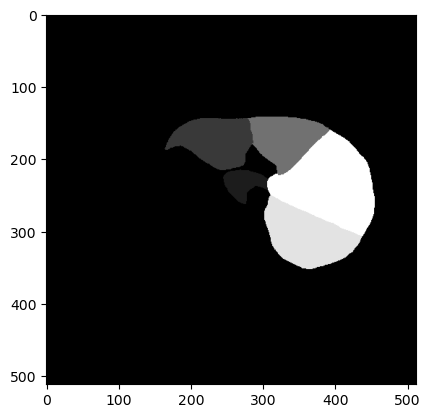

(512, 512, 3)
(512, 512, 3)


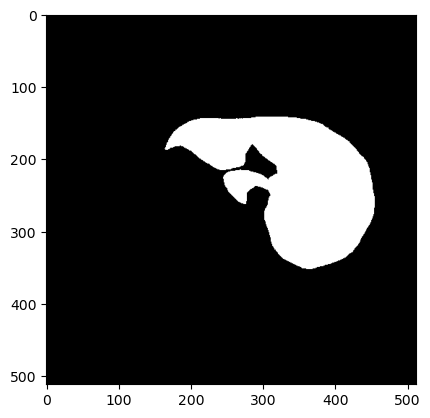

In [35]:
img = cv2.imread("D:/TOPIC/eight_seg/mask/mask10_24.png")
test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# def rgb2gray(rgb):

#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

#     return gray


plt.imshow(test)
plt.show()
print(test.shape)

# test2 = rgb2gray(test)
# print(test2.shape)
# plt.imshow(test2)
# plt.show()


ret, output1 = cv2.threshold(test, 10, 255, cv2.THRESH_BINARY)
print(output1.shape)
plt.imshow(output1)
plt.show()

## 測試img跟遮罩，查看肝臟切割的準確度

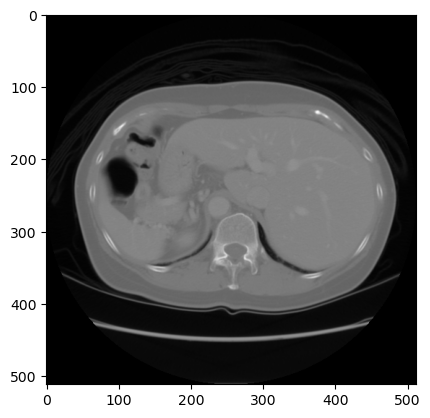

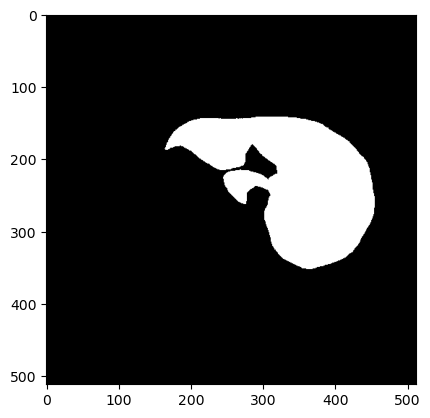

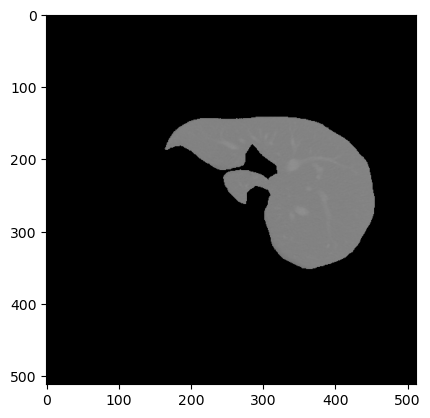

In [38]:
img1 = cv2.imread("D:/TOPIC/eight_seg/img/img10_24.png")
img2 = cv2.imread("D:/TOPIC/eight_seg/mask/mask10_24.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
ret, img2 = cv2.threshold(test, 10, 255, cv2.THRESH_BINARY)
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
img3 = cv2.bitwise_and(img1, img2)
plt.imshow(img3)
plt.show()

In [19]:
import cv2
import numpy as np

img = cv2.imread("D:/TOPIC/eight_seg/mask/mask10_24.png")
print(img.shape)
image = cv2.resize(img, (128, 128), interpolation=cv2.INTER_AREA)
print(image.shape)


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


a = rgb2gray(image)


cv2.startWindowThread()
cv2.namedWindow("preview1")
cv2.imshow("preview1", a)
cv2.waitKey(0)




(512, 512, 3)
(128, 128, 3)


In [124]:
from sklearn.cluster import KMeans

In [79]:
# img2 = imread("H:/畢業專題/eight_seg/mask/mask10_24.png")

# estimator = KMeans(n_clusters=8, random_state=42, init='k-means++')
# estimator.fit(img2)
# centroids = estimator.cluster_centers_


# result = []
# result_width = 128
# result_height_per_center = 80
# n_channels = img2.shape[1]

# for center_index in range(8):
#     result.append(np.full((result_width * result_height_per_center, n_channels), centroids[center_index], dtype=int))

# result = np.array(result)
# result = result.reshape((result_height_per_center * 8, result_width, n_channels))
# result = result.astype(np.uint8)

# # print(result)
# # plt.imshow(result)

c:\Users\USER\.conda\envs\opencv-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## TEST K-means

(512, 512)
(512, 512)


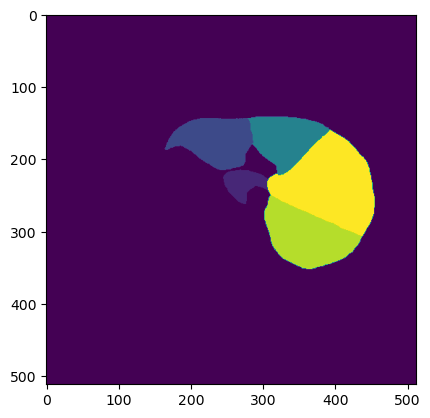

(131072, 2)


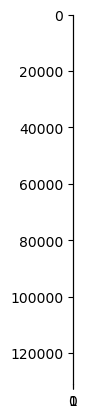

In [125]:
img2 = imread("H:/畢業專題/eight_seg/mask/mask10_24.png")
print(img2.shape)
img2 = np.array(img2)
print(img2.shape)
plt.imshow(img2)
plt.show()
data = img2.reshape(-1, 2)
print(data.shape)
plt.imshow(data)
plt.show()

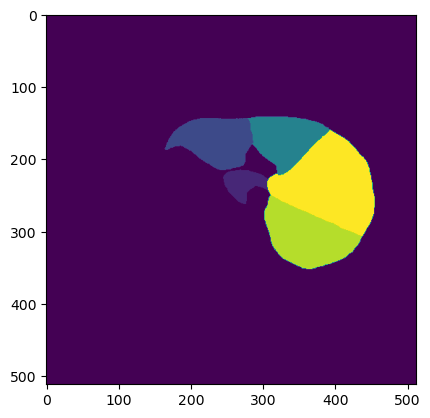

8


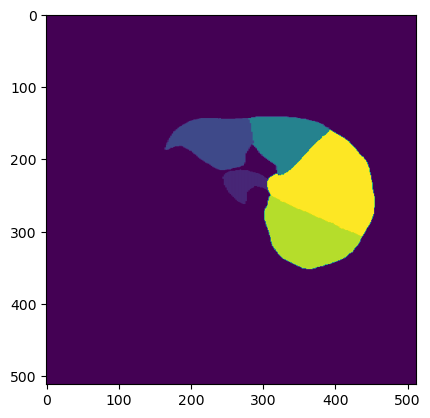

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
import matplotlib.pyplot as plt
from copy import deepcopy

imOrigin= Image.open('H:/畢業專題/eight_seg/mask/mask10_24.png')
plt.imshow(imOrigin)
plt.show()
dataOrigin= np.array(imOrigin)

data = dataOrigin.reshape(-1,2)
n_clusters = 8
# while n_clusters >= 4:
plt.cla()
print(n_clusters)

kmeansPredicter = KMeans(n_clusters = n_clusters)
kmeansPredicter.fit(data)
temp = kmeansPredicter.labels_
dataNew = kmeansPredicter.cluster_centers_[temp]
data = deepcopy(dataNew)
dataNew = np.uint8(dataNew)
dataNew.shape = dataOrigin.shape
plt.imshow(dataNew)
plt.pause(0.01)
# n_clusters //= 2
print(dataNew[:])


## Test


In [112]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

c:\Users\USER\.conda\envs\opencv-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


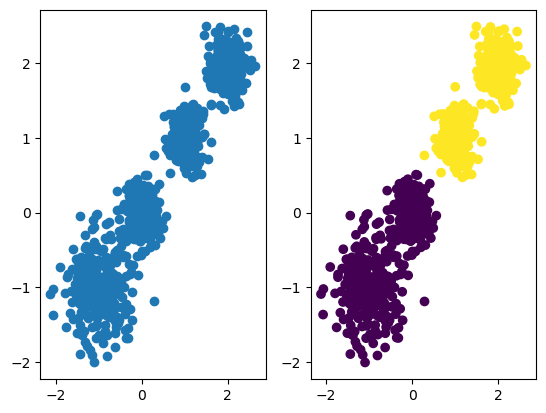

In [113]:
X, y = make_blobs(n_samples=1000, n_features=2,centers=[[-1,-1], [0,0], [1,1], [2,2]],
cluster_std=[0.4, 0.2, 0.2, 0.2],random_state =9)
y_pred = KMeans(n_clusters=2, random_state=9)
y_pred = y_pred.fit_predict(X)
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [114]:
y_pred = KMeans(n_clusters=2, random_state=9)

c:\Users\USER\.conda\envs\opencv-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


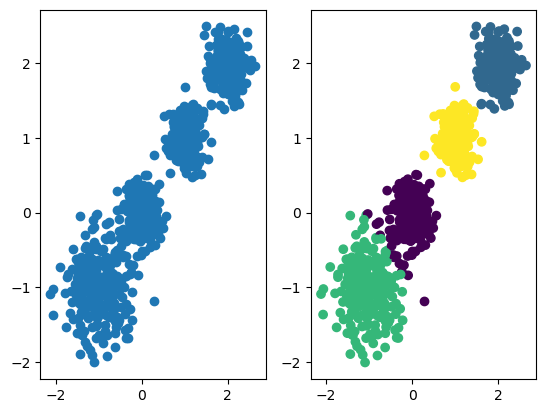

In [116]:
y_pred = KMeans(n_clusters=3, random_state=9)
y_pred = KMeans(n_clusters=4, random_state=9)
y_pred = y_pred.fit_predict(X)
plt.figure()
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

## 完整

In [49]:
seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

IMG_PATH = 'H:/畢業專題/eight_seg/img/'
MASK_PATH = 'H:/畢業專題/eight_seg/mask/'

train_ids = next(os.walk(IMG_PATH))[2]
train_ids_mask = next(os.walk(MASK_PATH))[2]

X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)   #np.bool
# print(train_ids)


# for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):

#     img = imread(IMG_PATH + id_)[:,:]
#     # print(img.shape)
    
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
    
#     X_train[n] = img
    
# print(X_train.shape)
# plt.imshow(X_train[30])
# plt.show()


for n, id_ in tqdm(enumerate(train_ids_mask), total=len(train_ids_mask)):
    # for file in next(os.walk(MASK_PATH))[2]:
    img2 = imread(MASK_PATH + id_)[:,:]
    # print(img2.shape)
    
    img2 = resize(img2, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant', preserve_range=True)
    # plt.imshow(img2)
    # plt.show()
    Y_train[n] = img2
    # plt.imshow(Y_train[n])
    # plt.show()
print(Y_train.shape)

print(Y_train.shape)
plt.imshow(Y_train[25])
plt.show()

# sum=0
# for i in range(len(train_ids)):
#     X_train[i] = img[i]
#     Y_train[i] = img2[i]

# print(X_train.shape)
# print(Y_train.shape)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.33, random_state = 42)
print(X_train.shape)
print(X_validation.shape)
print(Y_train.shape)
print(Y_validation.shape)

(1449, 128, 128, 1)
(715, 128, 128, 1)
(1449, 128, 128, 1)
(715, 128, 128, 1)


In [56]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [57]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [58]:
train_history =model.fit(X_train,
                         Y_train,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=2)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Tim\anaconda3\envs\liver-topic\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 128, 128, 1) vs (None, 128, 128, 3)).


In [75]:
score = model.evaluate(X_train, Y_train)
print(score[1] * 100)

46/46 [==============================] - 2s 36ms/step - loss: 0.6673 - accuracy: 0.9406
94.0635085105896


## 怪怪的

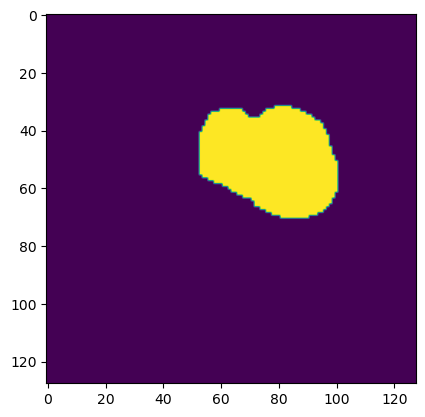

In [76]:
plt.imshow(Y_validation[300])
plt.show()

In [92]:
################################
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('H:/畢業專題/stage/model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
122/122 [==============================] - 7s 52ms/step - loss: 0.6339 - accuracy: 1.0000 - val_loss: 0.6047 - val_accuracy: 1.0000
Epoch 2/25
122/122 [==============================] - 5s 43ms/step - loss: 0.5785 - accuracy: 1.0000 - val_loss: 0.5527 - val_accuracy: 1.0000
Epoch 3/25
122/122 [==============================] - 5s 43ms/step - loss: 0.5293 - accuracy: 1.0000 - val_loss: 0.5061 - val_accuracy: 1.0000
Epoch 4/25
122/122 [==============================] - 5s 43ms/step - loss: 0.4849 - accuracy: 1.0000 - val_loss: 0.4641 - val_accuracy: 1.0000
Epoch 5/25
122/122 [==============================] - 5s 43ms/step - loss: 0.4450 - accuracy: 1.0000 - val_loss: 0.4261 - val_accuracy: 1.0000
Epoch 6/25
122/122 [==============================] - 5s 43ms/step - loss: 0.4088 - accuracy: 1.0000 - val_loss: 0.3918 - val_accuracy: 1.0000
Epoch 7/25
122/122 [==============================] - 5s 43ms/step - loss: 0.3761 - accuracy: 1.0000 - val_loss: 0.3607 - val_accuracy: 1.0000

In [93]:
result = model.evaluate(X_validation, Y_validation)
print(result)

23/23 [==============================] - 1s 28ms/step - loss: 0.2306 - accuracy: 0.9421
[0.23061604797840118, 0.9420586228370667]


In [ ]:
#因為他的目錄跟images的病患照片的名稱相同，而且病患照片只有一張，所以才用這樣
    # print("path = ", path)
    # print("id_ = ", id_)
#     img = imread(path + '/img/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     # print("img = ", path + '/images/' + id_ + '.png')
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_train[n] = img  #Fill empty X_train with values from img
#     mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
#     # print(mask)
#     for mask_file in next(os.walk(path + '/masks/'))[2]:
#         mask_ = imread(path + '/masks/' + mask_file)
#         # print(mask_.shape)
#         mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True), axis=-1)
#         # print(mask_.shape)
#         mask = np.maximum(mask, mask_)  
#         # print(mask)
#     Y_train[n] = mask   
    
# # test images
# X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# sizes_test = []
# print('Resizing test images') 
# for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
#     path = TEST_PATH + id_
#     img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
#     sizes_test.append([img.shape[0], img.shape[1]])
#     img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
#     X_test[n] = img

# print('Done!')

# image_x = random.randint(0, len(train_ids))
# imshow(X_train[image_x])
# plt.show()
# imshow(np.squeeze(Y_train[image_x]))
# plt.show()